In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# makes sure charts appear in the notebook rather than a popup window
%matplotlib inline

In [3]:
pd.options.display.max_columns = 60
df = pd.read_csv('./carnivorous_diet.csv', encoding='latin1')
df.head()

/var/folders/b5/0_tkhzk50998yq1mgzytzf8c0000gn/T/ipykernel_89982/3871761178.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./carnivorous_diet.csv', encoding='latin1')


,recordID,orderCarni,familyCarni,scientificNameCarni,commonNameCarni,sexCarni,lifeStageCarni,foodType,orderPrey,familyPrey,genusPrey,speciesPrey,scientificNamePrey,commonNamePrey,domesticOrAgricultural,taxonRankPrey,percentage,percentageError,dataBasisFromSource,sampleSizeScatStomachTissue,sampleSizeKillsPreyItems,startYear,endYear,startMonth,endMonth,fixedBetweenMonths,startDayOfYear,endDayOfYear,season,minimumElevationInMeters,maximumElevationInMeters,geographicRegion,country,stateProvince,county,municipality,verbatimLocality,protectedAreaHigher,protectedAreaLower,islandGroup,island,studyAreaSize,decimalLatitude,decimalLongitude,georeferenceSources,samplingProtocol,methodQuantification,sourceAuthor,sourceYear,sourceTitle,sourceJournal,sourcePrimaryReference,sourceCollectionReference
0,1,Carnivora,Felidae,Acinonyx_jubatus,Cheetah,Both,Unspecified,Mammal,Cetartiodactyla,Bovidae,Aepyceros,melampus,Aepyceros_melampus,Impala,0.0,Species,77.1,NaN,Table,35.0,NaN,2012.0,2013.0,September,October,No,NaN,NaN,Annual,NaN,NaN,NaN,Botswana,NaN,NaN,NaN,NaN,Northern Tuli Game Reserve,NaN,NaN,NaN,NaN,-22.17685,29.046635,GoogleMaps,Scat,Occurrence in source (%),"Craig, C",2017,A record of cheetah (Acinonyx jubatus) diet in...,African Journal of Ecology,"Craig, Christie A., Eleanor I. Brassine, and D...","Craig, Christie A., Eleanor I. Brassine, and D..."
1,2,Carnivora,Felidae,Acinonyx_jubatus,Cheetah,Both,Unspecified,Mammal,Cetartiodactyla,Bovidae,Tragelaphus,NaN,NaN,"Tragelaphus, undetermined",0.0,Genus,45.7,NaN,Table,35.0,NaN,2012.0,2013.0,September,October,No,NaN,NaN,Annual,NaN,NaN,NaN,Botswana,NaN,NaN,NaN,NaN,Northern Tuli Game Reserve,NaN,NaN,NaN,NaN,-22.17685,29.046635,GoogleMaps,Scat,Occurrence in source (%),"Craig, C",2017,A record of cheetah (Acinonyx jubatus) diet in...,African Journal of Ecology,"Craig, Christie A., Eleanor I. Brassine, and D...","Craig, Christie A., Eleanor I. Brassine, and D..."
2,3,Carnivora,Felidae,Acinonyx_jubatus,Cheetah,Both,Unspecified,Mammal,Cetartiodactyla,Bovidae,Raphicerus,campestris,Raphicerus_campestris,Steenbok,0.0,Species,8.6,NaN,Table,35.0,NaN,2012.0,2013.0,September,October,No,NaN,NaN,Annual,NaN,NaN,NaN,Botswana,NaN,NaN,NaN,NaN,Northern Tuli Game Reserve,NaN,NaN,NaN,NaN,-22.17685,29.046635,GoogleMaps,Scat,Occurrence in source (%),"Craig, C",2017,A record of cheetah (Acinonyx jubatus) diet in...,African Journal of Ecology,"Craig, Christie A., Eleanor I. Brassine, and D...","Craig, Christie A., Eleanor I. Brassine, and D..."
3,4,Carnivora,Felidae,Acinonyx_jubatus,Cheetah,Both,Unspecified,Mammal,Perissodactyla,Equidae,Equus,quagga,Equus_quagga,Burchell's zebra,0.0,Species,5.7,NaN,Table,35.0,NaN,2012.0,2013.0,September,October,No,NaN,NaN,Annual,NaN,NaN,NaN,Botswana,NaN,NaN,NaN,NaN,Northern Tuli Game Reserve,NaN,NaN,NaN,NaN,-22.17685,29.046635,GoogleMaps,Scat,Occurrence in source (%),"Craig, C",2017,A record of cheetah (Acinonyx jubatus) diet in...,African Journal of Ecology,"Craig, Christie A., Eleanor I. Brassine, and D...","Craig, Christie A., Eleanor I. Brassine, and D..."
4,5,Carnivora,Felidae,Acinonyx_jubatus,Cheetah,Both,Unspecified,Mammal,Cetartiodactyla,Bovidae,Tragelaphus,scriptus,Tragelaphus_scriptus,Bushbuck,0.0,Species,5.7,NaN,Table,35.0,NaN,2012.0,2013.0,September,October,No,NaN,NaN,Annual,NaN,NaN,NaN,Botswana,NaN,NaN,NaN,NaN,Northern Tuli Game Reserve,NaN,NaN,NaN,NaN,-22.17685,29.046635,GoogleMaps,Scat,Occurrence in source (%),"Craig, C",2017,A record of cheetah (Acinonyx jubatus) diet in...,African Journal of Ecology,"Craig, Christie A., Eleanor I. Brassine, and D...","Craig, Christie A., Eleanor I. Brassine, and D..."


In [4]:
# Remove index duplicate (recordID) and columns made of 99% 'Unknown's
df.drop(columns=['recordID', 'lifeStageCarni'], inplace=True)


In [5]:
# Remove all columns whose N/A represent more than half the dataset
def is_majority_na(columnName):
    return df[columnName].isna().sum() > len(df) / 2

for i in df.columns:
    if (is_majority_na(i)):
        print(f'Dropping column {i}')
        df.drop(columns=[i], inplace=True)



Dropping column speciesPrey
Dropping column scientificNamePrey
Dropping column percentageError
Dropping column sampleSizeKillsPreyItems
Dropping column startDayOfYear
Dropping column endDayOfYear
Dropping column minimumElevationInMeters
Dropping column maximumElevationInMeters
Dropping column geographicRegion
Dropping column stateProvince
Dropping column county
Dropping column municipality
Dropping column verbatimLocality
Dropping column protectedAreaHigher
Dropping column protectedAreaLower
Dropping column islandGroup
Dropping column island


In [6]:
# Remove typos in commonNamePrey.
df.drop(index=[*df.loc[df['commonNamePrey'] == '0.1-0.3kg rodent'].index,
        *df.loc[df['commonNamePrey'] == '0.3-0.5 kg rodent'].index], inplace=True)


In [7]:
# Drop duplicates based on commonNameCarni & commonNamePrey
animals = df.sort_values(by='sourceYear', ascending=False).drop_duplicates(subset=['commonNameCarni', 'commonNamePrey'])


count    103.000000
mean      47.456311
std       55.633566
min        2.000000
25%       10.500000
50%       30.000000
75%       68.500000
max      345.000000
Name: commonNamePrey, dtype: float64


<Axes: xlabel='commonNameCarni'>

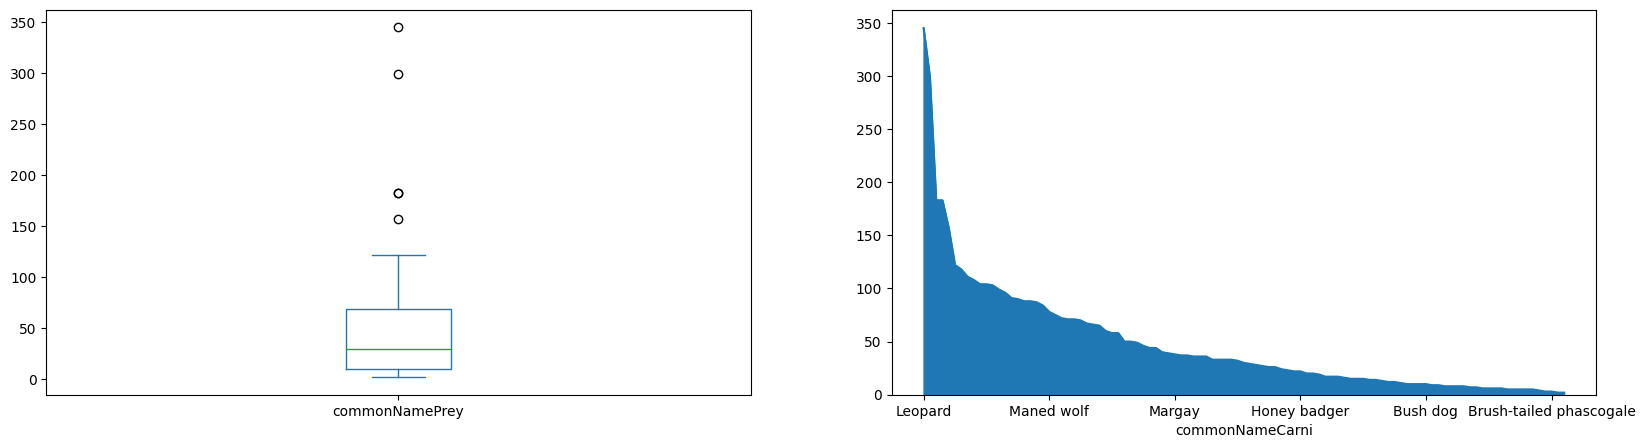

In [8]:
# Distribution of number of preys per predator
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20, 5))
preys_per_predator = animals.groupby("commonNameCarni")["commonNamePrey"].count().sort_values(
    ascending=False
)
print(preys_per_predator.describe())
preys_per_predator.plot(kind='box', ax=ax1)
preys_per_predator.plot(kind='area', ax=ax2)

# Leopards and red foxes will eat anything

count    1633.000000
mean        2.993264
std         5.564733
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        83.000000
Name: commonNameCarni, dtype: float64


<Axes: xlabel='commonNamePrey'>

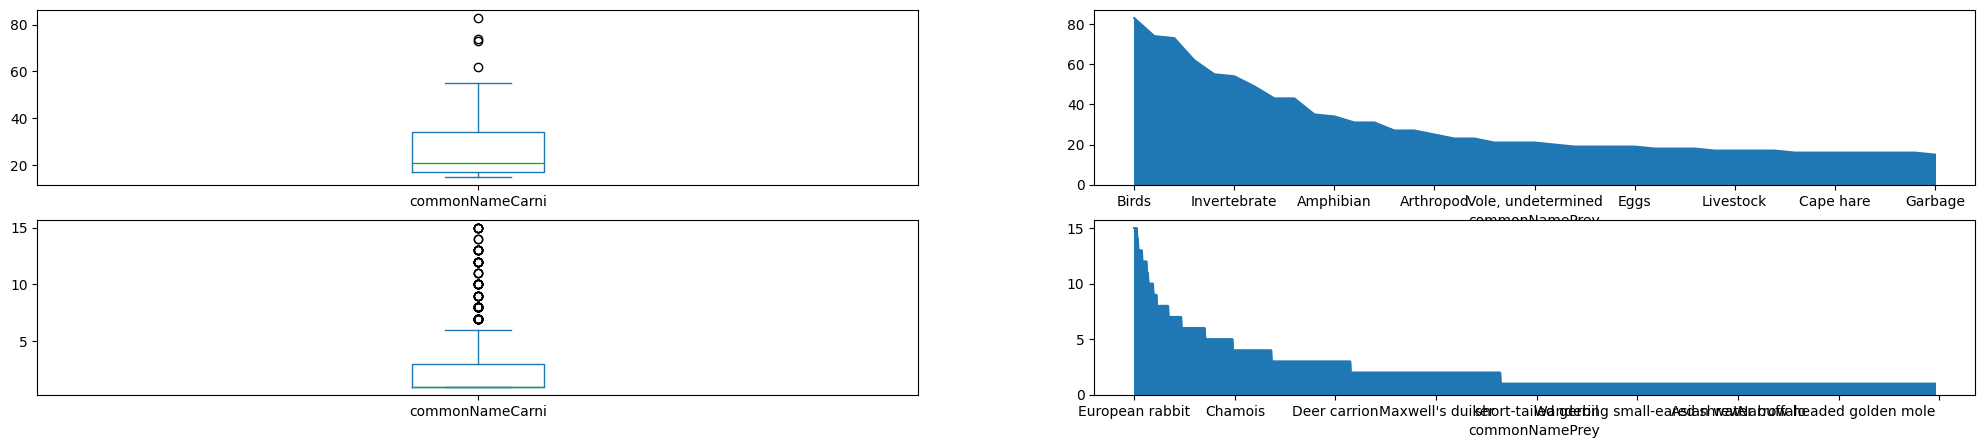

In [9]:
# Distribution of number of predators per prey
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(25, 5))
predators_per_prey = animals.groupby("commonNamePrey")["commonNameCarni"].count().sort_values(
    ascending=False
)
print(predators_per_prey.describe())

# The data is actually divided in two, the first 41 are broad categories, while the rest are individual species:
predators_per_prey_categories = predators_per_prey[0:41:]
predators_per_prey_species = predators_per_prey[41::]

predators_per_prey_categories.plot(kind='box', ax=ax1)
predators_per_prey_categories.plot(kind='area', ax=ax2)
predators_per_prey_species.plot(kind='box', ax=ax3)
predators_per_prey_species.plot(kind='area', ax=ax4)

# European rabbits are f***ed


<Axes: xlabel='country'>

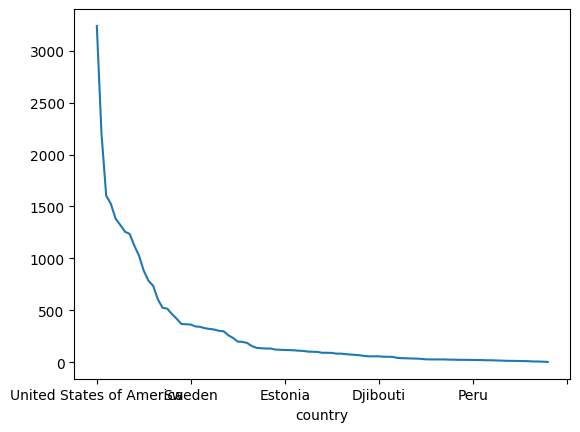

In [10]:
df["country"].value_counts().plot()

In [11]:
# Greatest predators per family:


<Axes: xlabel='sourceTitle'>

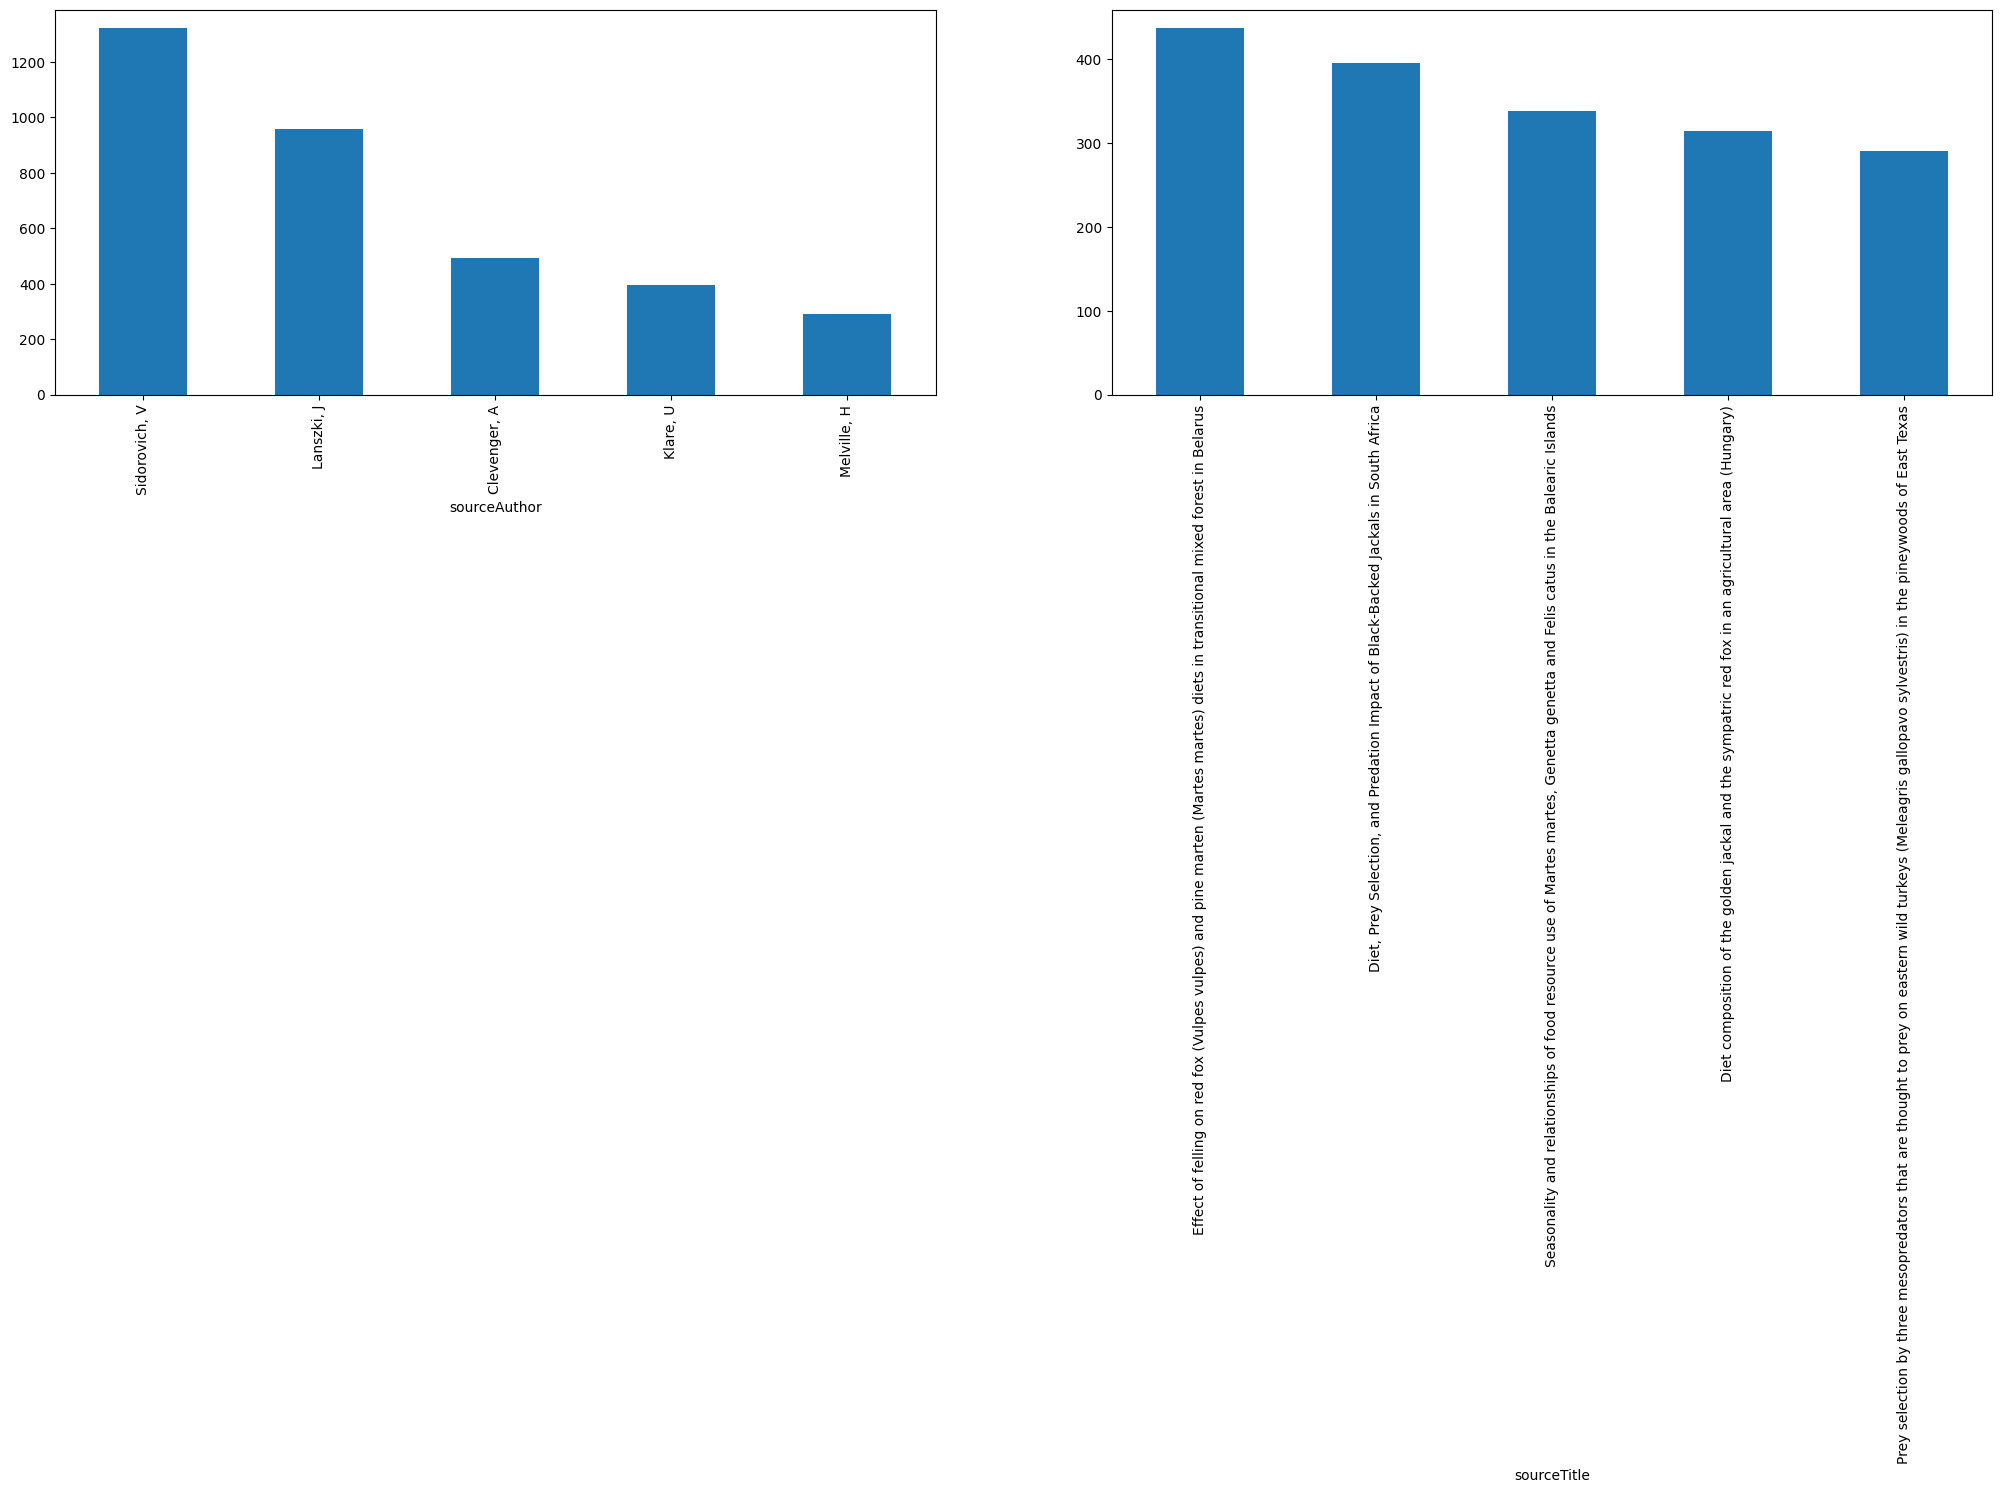

In [18]:
# Scientific articles where the data is from:
articles_per_authors = df.groupby('sourceAuthor')['sourceTitle'].count().sort_values(ascending=False)[0:5:]
rows_per_article = df.groupby('sourceTitle')['commonNameCarni'].count().sort_values(ascending=False)[0:5:]

fig, [ax1, ax2]= plt.subplots(1, 2, figsize=(25, 5))

articles_per_authors.plot(kind='bar', ax=ax1)
rows_per_article.plot(kind='bar', ax=ax2)